In [1]:
from datasets import load_dataset
dataset = load_dataset("usvsnsp/generation-semantic-filters")

/Users/kyle/miniconda3/envs/memorization/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd 
pile = dataset['pile_deduped_12b']
memorized = dataset['memories_deduped_12b']
pile

Dataset({
    features: ['sequence_id', 'tokens', 'text', 'is_incrementing', 'is_repeating', 'sequence_duplicates', 'max_frequency', 'avg_frequency', 'min_frequency', 'median_frequency', 'p25_frequency', 'p75_frequency', 'frequencies', 'nl_scores', '0_8_snowclones', '0_9_snowclones', '0_8_templates', '0_9_templates', 'huffman_coding_length', 'memorization_score', 'index', 'loss', 'prompt_perplexity', 'generation_perplexity', 'sequence_perplexity'],
    num_rows: 5000000
})

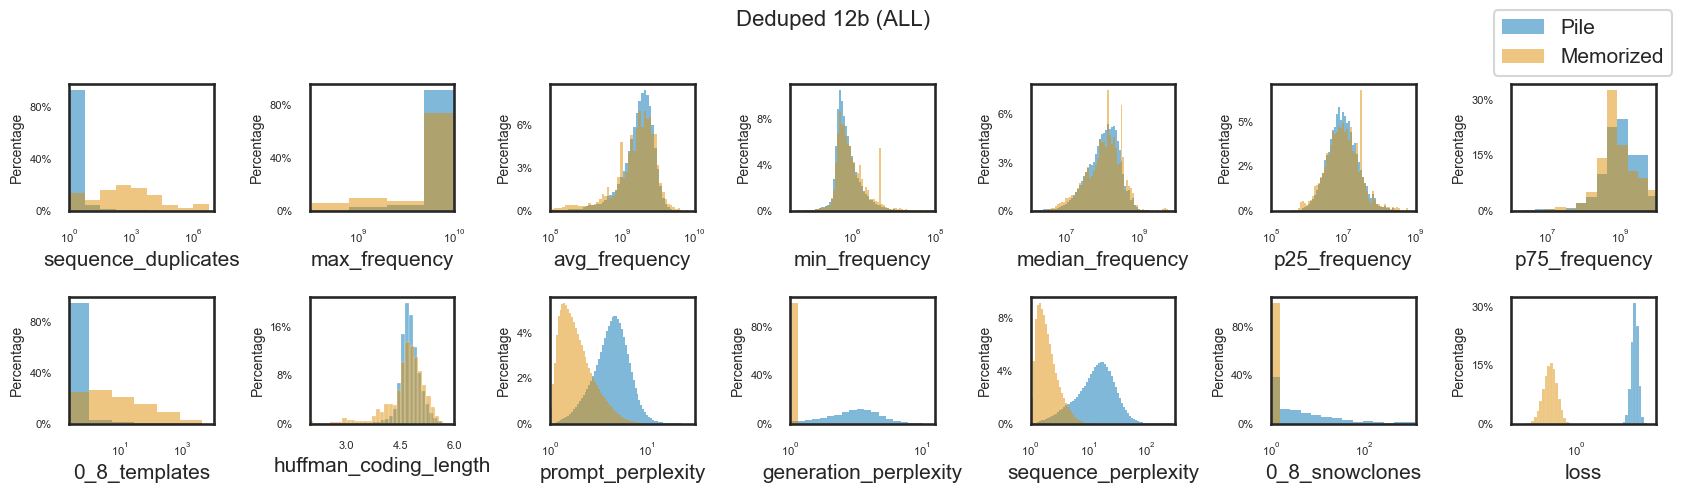

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter, MaxNLocator, LogLocator 

splits = ['_deduped_12b']
#splits = ['.deduped.1.4b', '.deduped.12b', '.deduped.160m', '.deduped.1b', '.deduped.2.8b', '.deduped.410m', '.deduped.6.9b', '.deduped.70m', '.duped.1.4b', '.duped.12b', '.duped.160m', '.duped.1b', '.duped.2.8b', '.duped.410m', '.duped.6.9b', '.duped.70m']
 
features = [
    'sequence_duplicates', 'max_frequency', 'avg_frequency', 'min_frequency',
    'median_frequency', 'p25_frequency', 'p75_frequency',
    '0_8_templates', 'huffman_coding_length', 'prompt_perplexity', 'generation_perplexity', 'sequence_perplexity', '0_8_snowclones', 'loss'
]

e = 1e-10
#sns.set_theme(style="darkgrid")
sns.set_style("white")
sns.set_theme(style="white")
sns.set_palette("colorblind")
palette  = sns.color_palette("colorblind")

sns.set_context("talk")

num_rows = 2
num_columns = 7 
fig, axs = plt.subplots(num_rows, num_columns, figsize=(17, 5))
axs = axs.flatten()

for i, split in enumerate(splits):
    for j, fx in enumerate(features):
        mem = dataset['memories' + split][fx]
        mem = [value for value in mem if value >= 0]
        #mem = mem[:1000]
        df_mem = pd.DataFrame(mem, columns=[fx])

        ppile = dataset['pile' + split][fx]
        ppile = [value for value in ppile if value >= 0]
        #ppile = ppile[:1000]
        df_pile = pd.DataFrame(ppile, columns=[fx])

        bins_per_feature = {
        'sequence_duplicates': 10,
        'max_frequency': 15,
        'avg_frequency': 150,
        'min_frequency': 150,
        'median_frequency': 100,
        'p25_frequency': 100,
        'p75_frequency': 20,
        '0_8_templates': 20,
        'prompt_perplexity': 100,
        'generation_perplexity': 35,
        'sequence_perplexity': 100, 
        'huffman_coding_length': 60, #dont take log scale for this feature 
        '0_8_snowclones': 60, 
        'loss': 50 
          }
        
        min_threshold = {
        'sequence_duplicates': 10**0,
        'max_frequency': 10**8.5,
        'avg_frequency': 10**8,
        'min_frequency': 10**4.5,
        'median_frequency': 10**6,
        'p25_frequency': 10**5,
        'p75_frequency': 10**6,
        '0_8_templates': 10**-0.6,
        'prompt_perplexity': 10**0,
        'generation_perplexity': 10**0,
        'sequence_perplexity': 10**0, 
        'huffman_coding_length': 2, 
        '0_8_snowclones': 10**0, 
        'loss': 10**-0.5
        }

        max_threshold = {
        'sequence_duplicates': 10**7,
        'max_frequency': 10**10,
        'avg_frequency': 10**10,
        'min_frequency': 10**8,
        'median_frequency': 10**10,
        'p25_frequency': 10**9,
        'p75_frequency': 10**10,
        '0_8_templates': 10**4,
        'prompt_perplexity': 10**1.5,
        'generation_perplexity': 10**1.1,
        'sequence_perplexity': 10**2.5, 
        'huffman_coding_length': 6,
        '0_8_snowclones': 10**3.1, 
        'loss': 10**0.5
        }


    
        bins_all = np.logspace(np.log10(min(df_mem[fx].min(), df_pile[fx].min())+e), np.log10(max(df_mem[fx].max(), df_pile[fx].max())), bins_per_feature[fx])
        if fx == 'huffman_coding_length':
            bins = 60 
        else: 
            bins = bins_all  

        sns.histplot(data=df_pile[fx], bins=bins, label="Pile", ax=axs[i * num_columns + j], alpha=0.5, stat="percent", color=palette[0])
        sns.histplot(data=df_mem[fx], bins=bins, label="Memorized", ax=axs[i * num_columns + j], alpha=0.5, stat="percent", color=palette[1])


        if fx == 'huffman_coding_length':
            axs[i * num_columns + j].set_xscale('linear') 
            axs[i * num_columns + j].yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
            axs[i * num_columns + j].set_xlim(min_threshold[fx], max_threshold[fx])
            axs[i * num_columns + j].xaxis.set_major_locator(MaxNLocator(nbins=3))
            axs[i * num_columns + j].yaxis.set_major_locator(MaxNLocator(nbins=3))

        elif fx == 'loss':
            axs[i * num_columns + j].set_xscale('log')   
            axs[i * num_columns + j].yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
            axs[i * num_columns + j].xaxis.set_major_locator(LogLocator(numticks=3)) 
            axs[i * num_columns + j].yaxis.set_major_locator(MaxNLocator(nbins=3))
           
        else:
            axs[i * num_columns + j].set_xscale('log')   
            axs[i * num_columns + j].yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
            axs[i * num_columns + j].set_xlim(min_threshold[fx], max_threshold[fx])
            #axs[i * num_columns + j].set_xticks([min_threshold[fx], (min_threshold[fx] + max_threshold[fx])/ 2, max_threshold[fx]])
            axs[i * num_columns + j].xaxis.set_major_locator(LogLocator(numticks=3)) 
            axs[i * num_columns + j].yaxis.set_major_locator(MaxNLocator(nbins=3))
         
        #axs[j].set_yscale('log')   


        axs[i * num_columns + j].tick_params(axis='both', labelsize=8) 

        axs[i * num_columns + j].set_xlabel(fx, fontsize=15)
        axs[i * num_columns + j].set_ylabel('Percentage', fontsize=10)
    
        #axs[i * num_columns + j].set_title(split[1:].replace('.', ' ', 1), fontsize=15)

#plt.suptitle(split[1:].replace('.', ' ', 1), y=1.0, fontsize=14)
#plt.subplots_adjust(hspace=0.5, wspace=0.5, bottom=2)
# plt.suptitle('Deduped 12b (ALL)', y=1.0, fontsize=16)
fig.legend(labels=["Pile", "Memorized"], loc='upper right', fontsize=15)
plt.tight_layout()
plt.show()

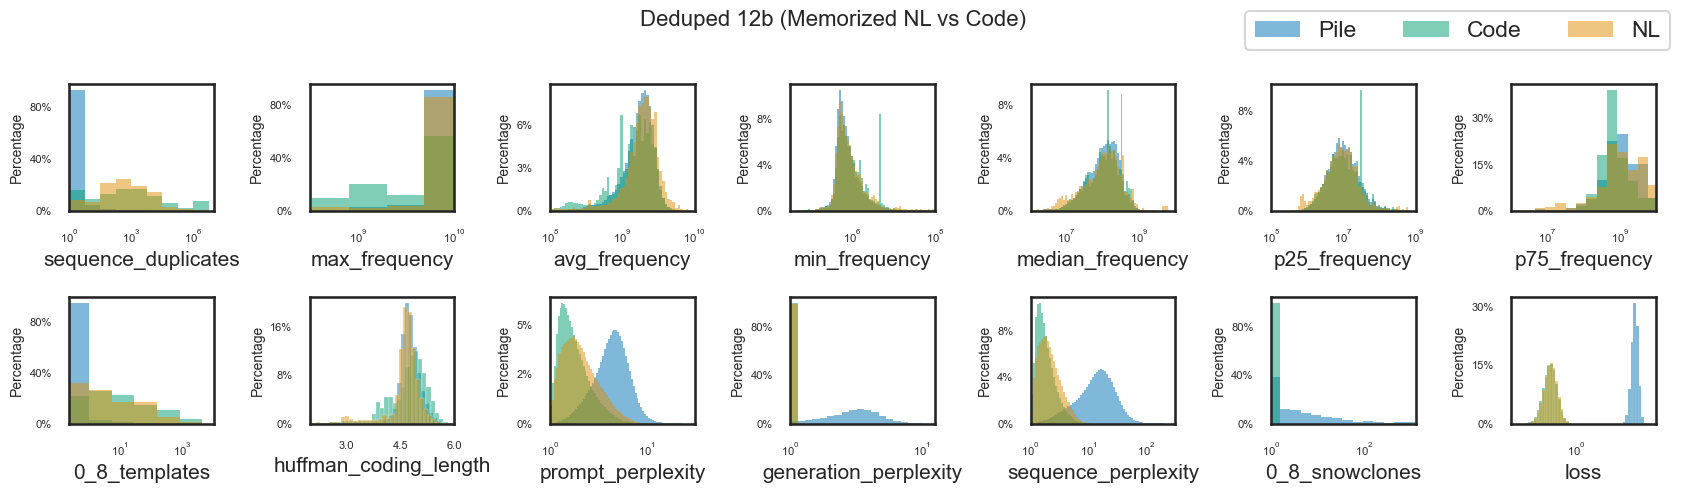

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter, MaxNLocator, LogLocator 

splits = ['_deduped_12b']
#splits = ['.deduped.1.4b', '.deduped.12b', '.deduped.160m', '.deduped.1b', '.deduped.2.8b', '.deduped.410m', '.deduped.6.9b', '.deduped.70m', '.duped.1.4b', '.duped.12b', '.duped.160m', '.duped.1b', '.duped.2.8b', '.duped.410m', '.duped.6.9b', '.duped.70m']
 
features = [
    'sequence_duplicates', 'max_frequency', 'avg_frequency', 'min_frequency',
    'median_frequency', 'p25_frequency', 'p75_frequency',
    '0_8_templates', 'huffman_coding_length', 'prompt_perplexity', 'generation_perplexity', 'sequence_perplexity', '0_8_snowclones', 'loss'
]


e = 1e-10
sns.set_style("white")
sns.set_theme(style="white")
sns.set_palette("colorblind")
palette  = sns.color_palette("colorblind")
sns.set_context("talk")

num_rows = 2
num_columns = 7 
fig, axs = plt.subplots(num_rows, num_columns, figsize=(17, 5))
axs = axs.flatten()

for i, split in enumerate(splits):
    for j, fx in enumerate(features):
        mem = dataset['memories_deduped_12b'].select_columns([fx, 'nl_scores'])
        #mem = [value for value in mem if value >= 0]
        #mem = mem[:100]
        df_mem = pd.DataFrame(mem, columns=[fx, 'nl_scores'])
        df_mem_nl = df_mem[df_mem['nl_scores'] > 0.457414]
        df_mem_nl = df_mem_nl.copy()
        df_mem_nl.drop(columns=['nl_scores'], inplace=True)

        df_mem_code = df_mem[df_mem['nl_scores'] <= 0.457414]
        df_mem_code = df_mem_code.copy()
        df_mem_code.drop(columns=['nl_scores'], inplace=True)

        ppile = dataset['pile' + split][fx]
        #ppile = [value for value in ppile if value >= 0]
        #ppile = ppile[:100]
        df_pile = pd.DataFrame(ppile, columns=[fx])


        #ppile = dataset['pile_deduped_12b'].select_columns([fx, 'nl_scores'])
        #ppile = [value for value in ppile if value >= 0]
        #ppile = ppile[:1000]
        #df_pile = pd.DataFrame(ppile, columns=[fx, 'nl_scores'])
        #df_pile_nl = df_pile[df_pile['nl_scores'] > 0.457414]
        #df_pile_nl = df_pile_nl.copy()
        #df_pile_nl.drop(columns=['nl_scores'], inplace=True)


        bins_per_feature = {
        'sequence_duplicates': 10,
        'max_frequency': 15,
        'avg_frequency': 150,
        'min_frequency': 150,
        'median_frequency': 100,
        'p25_frequency': 100,
        'p75_frequency': 20,
        '0_8_templates': 20,
        'prompt_perplexity': 100,
        'generation_perplexity': 35,
        'sequence_perplexity': 100, 
        'huffman_coding_length': 60, #dont take log scale for this feature 
        '0_8_snowclones': 60, 
        'loss': 50 
          }
        
        
        min_threshold = {
        'sequence_duplicates': 10**0,
        'max_frequency': 10**8.5,
        'avg_frequency': 10**8,
        'min_frequency': 10**4.5,
        'median_frequency': 10**6,
        'p25_frequency': 10**5,
        'p75_frequency': 10**6,
        '0_8_templates': 10**-0.6,
        'prompt_perplexity': 10**0,
        'generation_perplexity': 10**0,
        'sequence_perplexity': 10**0, 
        'huffman_coding_length': 2, 
        '0_8_snowclones': 10**0, 
        'loss': 10**-0.5
        }

        max_threshold = {
        'sequence_duplicates': 10**7,
        'max_frequency': 10**10,
        'avg_frequency': 10**10,
        'min_frequency': 10**8,
        'median_frequency': 10**10,
        'p25_frequency': 10**9,
        'p75_frequency': 10**10,
        '0_8_templates': 10**4,
        'prompt_perplexity': 10**1.5,
        'generation_perplexity': 10**1.1,
        'sequence_perplexity': 10**2.5, 
        'huffman_coding_length': 6,
        '0_8_snowclones': 10**3.1, 
        'loss': 10**0.5
        }


        min_value = min(df[fx].min() for df in [df_mem_nl, df_mem_code, df_pile])
        max_value = max(df[fx].max() for df in [df_mem_nl, df_mem_code, df_pile])

        #bins_all = np.logspace(np.log10(min(df_mem_nl[fx].min(), df_mem_code[fx].min())+e), np.log10(max(df_mem_nl[fx].max(), df_mem_code[fx].max())), bins_per_feature[fx])
        bins_all = np.logspace(np.log10(min_value+e), np.log10(max_value), bins_per_feature[fx])


        if fx == 'huffman_coding_length':
            bins = 60 
        else: 
            bins = bins_all  

        sns.histplot(data=df_pile[fx], bins=bins, label="Pile", ax=axs[i * num_columns + j], alpha=0.5, stat="percent", color=palette[0]) 
        sns.histplot(data=df_mem_code[fx], bins=bins, label="Code", ax=axs[i * num_columns + j], alpha=0.5, stat="percent", color=palette[2])
        sns.histplot(data=df_mem_nl[fx], bins=bins, label="NL", ax=axs[i * num_columns + j], alpha=0.5, stat="percent", color=palette[1]) 
        

        if fx == 'huffman_coding_length':
            axs[i * num_columns + j].set_xscale('linear') 
            axs[i * num_columns + j].yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
            axs[i * num_columns + j].set_xlim(min_threshold[fx], max_threshold[fx])
            axs[i * num_columns + j].xaxis.set_major_locator(MaxNLocator(nbins=3))
            axs[i * num_columns + j].yaxis.set_major_locator(MaxNLocator(nbins=3))

        elif fx == 'loss':
            axs[i * num_columns + j].set_xscale('log')   
            axs[i * num_columns + j].yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
            axs[i * num_columns + j].xaxis.set_major_locator(LogLocator(numticks=3)) 
            axs[i * num_columns + j].yaxis.set_major_locator(MaxNLocator(nbins=3))
           
        else:
            axs[i * num_columns + j].set_xscale('log')   
            axs[i * num_columns + j].yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
            axs[i * num_columns + j].set_xlim(min_threshold[fx], max_threshold[fx])
            #axs[i * num_columns + j].set_xticks([min_threshold[fx], (min_threshold[fx] + max_threshold[fx])/ 2, max_threshold[fx]])
            axs[i * num_columns + j].xaxis.set_major_locator(LogLocator(numticks=3)) 
            axs[i * num_columns + j].yaxis.set_major_locator(MaxNLocator(nbins=3))
         
        #axs[j].set_yscale('log')   

        #axs[i * num_columns + j].set_xlim(min(df_mem[fx].min(), df_pile[fx].min()), max(df_mem[fx].max(), df_pile[fx].max()))
        axs[i * num_columns + j].tick_params(axis='both', labelsize=8) 

        axs[i * num_columns + j].set_xlabel(fx, fontsize=15)
        axs[i * num_columns + j].set_ylabel('Percentage', fontsize=10)
        #axs[i * num_columns + j].set_title(split[1:].replace('.', ' ', 1), fontsize=15)

#plt.suptitle(split[1:].replace('.', ' ', 1), y=1.0, fontsize=14)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5, top=2)
plt.suptitle('Deduped 12b (Memorized NL vs Code)', y=1.0, fontsize=16)
#fig.legend(labels=["Pile", "Code", "NL"], loc='upper right', fontsize=13)
fig.tight_layout()
plt.show()

In [5]:
dataset

DatasetDict({
    pile_duped_6.9b: Dataset({
        features: ['sequence_id', 'tokens', 'text', 'is_incrementing', 'is_repeating', 'sequence_duplicates', 'max_frequency', 'avg_frequency', 'min_frequency', 'median_frequency', 'p25_frequency', 'p75_frequency', 'frequencies', 'nl_scores', '0_8_snowclones', '0_9_snowclones', '0_8_templates', '0_9_templates', 'huffman_coding_length', 'memorization_score', 'index', 'loss', 'prompt_perplexity', 'generation_perplexity', 'sequence_perplexity'],
        num_rows: 5000000
    })
    memories_duped_1b: Dataset({
        features: ['sequence_id', 'tokens', 'text', 'is_incrementing', 'is_repeating', 'sequence_duplicates', 'max_frequency', 'avg_frequency', 'min_frequency', 'median_frequency', 'p25_frequency', 'p75_frequency', 'frequencies', 'nl_scores', '0_8_snowclones', '0_9_snowclones', '0_8_templates', '0_9_templates', 'huffman_coding_length', 'memorization_score', 'index', 'loss', 'prompt_perplexity', 'generation_perplexity', 'sequence_perplexit

**CATEGORICAL FEATURES**

In [6]:
mem = dataset['memories_deduped_12b'].select_columns(['is_incrementing','is_repeating'])
pile = dataset['pile_deduped_12b'].select_columns(['is_incrementing','is_repeating'])

df_pile = pd.DataFrame(pile)
df_mem = pd.DataFrame(mem)


In [7]:
df_pile['is_templating'] = (df_pile['is_incrementing'] | df_pile['is_repeating'])
df_pile['is_templating'] = df_pile['is_templating'].astype(str)
df_mem['is_templating'] = (df_mem['is_incrementing'] | df_mem['is_repeating'])
df_mem['is_templating'] = df_mem['is_templating'].astype(str)

In [8]:
df_pile['ds'] = 'Pile'
df_mem['ds'] = 'Memorized'

In [9]:
dss = pd.concat([df_pile, df_mem])

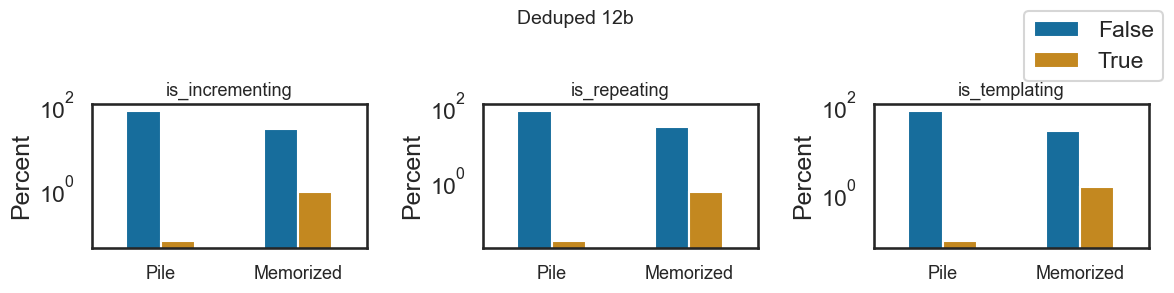

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.countplot(data=dss, x='ds', hue='is_incrementing', ax=axs[0], width=0.5, stat='percent')
axs[0].set_title('is_incrementing', fontsize=13)
#axs[0].set_xlabel('Category')
axs[0].set_ylabel('Percent')
axs[0].set_yscale("log")
axs[0].legend().set_visible(False)
axs[0].set_xlabel('')
axs[0].tick_params(axis='x', labelsize=13)

sns.countplot(data=dss, x='ds', hue='is_repeating', ax=axs[1], width=0.5, stat='percent')
axs[1].set_title('is_repeating', fontsize=13)
#axs[1].set_xlabel('Category')
axs[1].set_ylabel('Percent')
axs[1].set_yscale("log")
axs[1].legend().set_visible(False)
axs[1].set_xlabel('')
axs[1].tick_params(axis='x', labelsize=13)

sns.countplot(data=dss, x='ds', hue='is_templating', ax=axs[2], width=0.5, stat='percent')
axs[2].set_title('is_templating', fontsize=13)
#axs[2].set_xlabel('Category')
axs[2].set_ylabel('Percent')
axs[2].set_yscale("log")
axs[2].legend().set_visible(False)
axs[2].set_xlabel('')
axs[2].tick_params(axis='x', labelsize=13)

handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.subplots_adjust(hspace=0.5, wspace=0.5, top=1)
plt.suptitle('Deduped 12b', y=1.0, fontsize=14)
plt.tight_layout()
plt.show()
